# Project 1: Color Compressing

## Yêu cầu: 

Cài đặt thuật toán K-means Clustering để giảm số lượng màu cho ảnh.

## Cài đặt thuật toán

### Import thư viện numpy

In [1]:
import numpy as np

### Khởi tạo centroids

Centroids có thể được khởi tạo bằng hai cách:
* random: Centroids có `c` kênh màu, mỗi kênh màu `c` được khởi tạo giá trị ngẫu nhiên trong khoảng [0, 255]
* in_pixels: Centroids được chọn ngẫu nhiên trong các pixel của ảnh

In [2]:
def initialize_centroids(img, k_clusters, init_type):
    if init_type == 'random':
        return np.random.randint(0, 256, size=(k_clusters, len(img[0])))
    elif init_type == 'in_pixels':
        return np.random.choice(a=img, size=k_clusters)
    else:
        return None

### Dán label cho từng điểm ảnh

Label của một điểm ảnh là index của centroid mà khoảng cách từ điểm ảnh đến centroid đó là gần nhất

In [3]:
def label_pixels(img, centroids):
    labels = np.full(img.shape[0], -1)
    
    # With every pixel
    for i in range(img.shape[0]):
        # Get minimum distance (Euclidean distance) and label that pixel
        labels[i] = np.argmin([np.linalg.norm(img[i] - cen) for cen in centroids])
    
    return labels

### Cập nhật centroid

Centroid mới là trung bình của các điểm ảnh thuộc cluster của centroid cũ đó

In [4]:
def update_centroids(img, labels, old_centroids):
    centroids = np.zeros(old_centroids.shape)
    
    # With every centroid
    for i in range(old_centroids.shape[0]):
        # List indexes of every pixel was labeled with that centroid
        index = np.where(labels == i)[0]
        
        # Create a numpy array to save pixels belonging to that centroid 
        temp = np.zeros((len(index), 3))
        
        # Assign pixels to recently created array
        count = 0
        for idx in index:
            temp[count] = img[idx]
            count += 1
        
        # Calculate new centroid using mean on rows
        centroids[i] = np.mean(temp, axis=0)
        
    return centroids

### Thuật toán K-means Clustering

Gồm 4 bước chính:
* Bước 1: Khởi tạo centroids
* Bước 2: Dán label cho từng điểm ảnh
* Bước 3: Cập nhật lại centroids
* Bước 4: Lặp lại bước 2 và 3 cho tới khi đạt điều kiện dừng

In [5]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    # Initialize cluster centroids and label
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    labels = np.full(img_1d.shape[0], -1)
    
    # Run K-means
    for i in range(max_iter):
        # Label every pixels with a centroid
        labels = label_pixels(img_1d, centroids)
        
        # Recompute centroids based on current clusters
        centroids = update_centroids(img_1d, labels, centroids)
        
    return centroids, labels

## Chạy thuật toán với hình ảnh cụ thể

### Mở ảnh và tiền xử lí ảnh

In [6]:
from PIL import Image

# Open image
image = Image.open('rainbow.jpg')

# Convert image to numpy arrays
image = np.array(image)

# Flat image to a 1D array to fit function's argument
flat_image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

### Gán các giá trị cần thiết

In [7]:
# Init number of clusters
k_clusters = 5

# Init maximum iterator for stop criterion of K-means function
max_iter = 5

# Init centroids type
init_centroids = 'random'

### Chạy K-means Clustering với ảnh và các tham số đã được gán 

In [8]:
# Run K-means
centroids, labels = kmeans(flat_image, k_clusters, max_iter, init_centroids)

### Khôi phục ảnh

In [9]:
# Recover image
result = flat_image

# With every pixel
for i in range(len(labels)):
    # Replace that pixel with its centroid
    label = labels[i]
    result[i] = centroids[label]

# Reshape to the original shape
result = result.reshape(image.shape)

### Hiển thị ảnh ở notebook

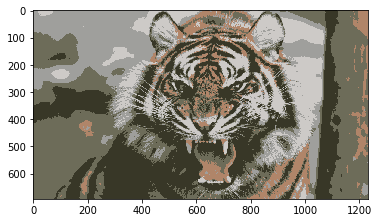

In [10]:
import matplotlib.pyplot as plt 

# Show image
plt.imshow(result)

### Xuất ảnh ra file

In [11]:
# Export image to file
Image.fromarray(result.astype(np.uint8)).save('output.png')